<a href="https://colab.research.google.com/github/Den9p/MO_2/blob/main/vers2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт библиотек

Импортируем библиотеки для работы

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import shutil
import random
from google.colab import files

# Загрузка датасета, просмотр, первичный анализ, визуализация, удаление пропусков

Загружаем датасет

In [258]:
import kagglehub

# Загрузка последней версии датасета
path = kagglehub.dataset_download("ayushtankha/70k-job-applicants-data-human-resource")
print("Path to dataset files:", path)

# Определяем целевой путь
target_path = os.path.join(os.getcwd(), '1')

# Проверяем, существует ли целевой путь, если да - удаляем
if os.path.exists(target_path):
    shutil.rmtree(target_path)

# Перемещаем датасет в текущую рабочую директорию
shutil.move(path, target_path)
print(f"Dataset moved to: {target_path}")

100%|██████████| 2.02M/2.02M [00:00<00:00, 85.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ayushtankha/70k-job-applicants-data-human-resource/versions/1
Dataset moved to: /content/1


Загружаем данные

In [259]:
df = pd.read_csv('/content/1/stackoverflow_full.csv')

Посмотрим на данные

In [260]:
df

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Описание столбцов

From the survey results, we have built a dataset with the following columns:

- Age: age of the applicant, >35 years old or <35 years old (categorical)
- EdLevel: education level of the applicant (Undergraduate, Master, PhD…) (categorical)
- Gender: gender of the applicant, (Man, Woman, or NonBinary) (categorical)
- MainBranch: whether the applicant is a profesional developer (categorical)
- YearsCode: how long the applicant has been coding (integer)
- YearsCodePro: how long the applicant has been coding in a professional context, (integer)
- PreviousSalary: the applicant's previous job salary (float)
- ComputerSkills: number of computer skills known by the applicant (integer)
- Employed: **target** variable, whether the applicant has been hired (categorical)

Посчитаем статистику для числовых столбцов

In [261]:
df.describe()

,Unnamed: 0,Employment,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,Employed
count,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000,73462.000000
mean,36730.500000,0.883096,14.218902,9.098377,67750.260611,13.428221,0.536223
std,21206.797075,0.321308,9.405172,7.960201,49488.142118,7.057835,0.498690
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,18365.250000,1.000000,7.000000,3.000000,28839.000000,8.000000,0.000000
50%,36730.500000,1.000000,12.000000,7.000000,57588.000000,13.000000,1.000000
75%,55095.750000,1.000000,20.000000,12.000000,95979.000000,17.000000,1.000000
max,73461.000000,1.000000,50.000000,50.000000,224000.000000,107.000000,1.000000


Посмотрим на типы данных в столбцах

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73462 entries, 0 to 73461
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      73462 non-null  int64  
 1   Age             73462 non-null  object 
 2   Accessibility   73462 non-null  object 
 3   EdLevel         73462 non-null  object 
 4   Employment      73462 non-null  int64  
 5   Gender          73462 non-null  object 
 6   MentalHealth    73462 non-null  object 
 7   MainBranch      73462 non-null  object 
 8   YearsCode       73462 non-null  int64  
 9   YearsCodePro    73462 non-null  int64  
 10  Country         73462 non-null  object 
 11  PreviousSalary  73462 non-null  float64
 12  HaveWorkedWith  73399 non-null  object 
 13  ComputerSkills  73462 non-null  int64  
 14  Employed        73462 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 8.4+ MB


Посмотрим на кол-во уникальных значений в каждой колонке

In [263]:
df.nunique()

,0
Unnamed: 0,73462
Age,2
Accessibility,2
EdLevel,5
Employment,2
Gender,3
MentalHealth,2
MainBranch,2
YearsCode,51
YearsCodePro,51


Посмотрим на все уникальные значения графически и табличкой

Age
Age
<35    47819
>35    25643
Name: count, dtype: int64


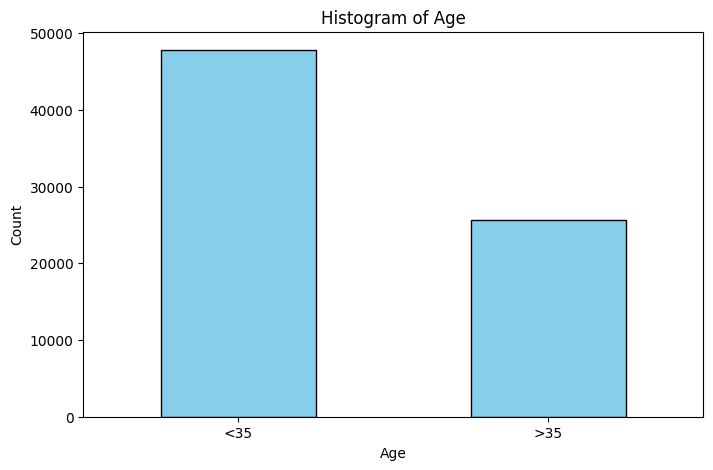

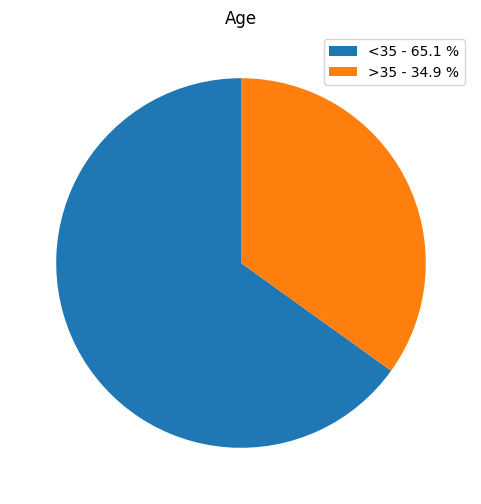

Accessibility
Accessibility
No     71355
Yes     2107
Name: count, dtype: int64


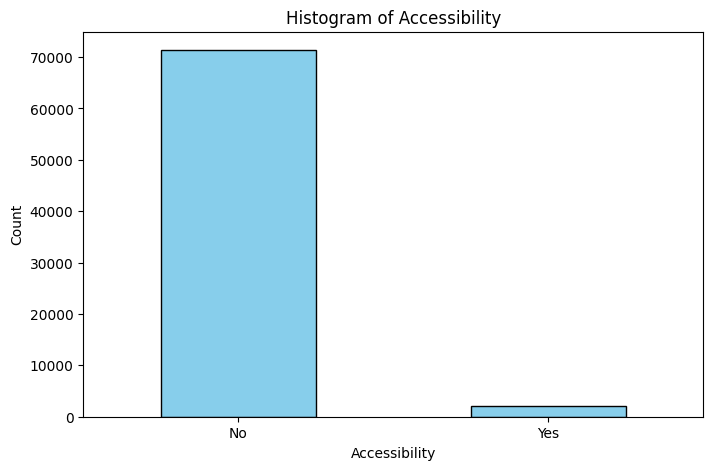

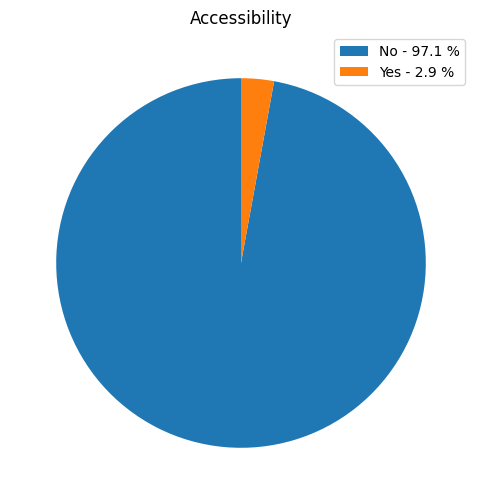

EdLevel
EdLevel
Undergraduate    37402
Master           18903
Other            10843
NoHigherEd        3706
PhD               2608
Name: count, dtype: int64


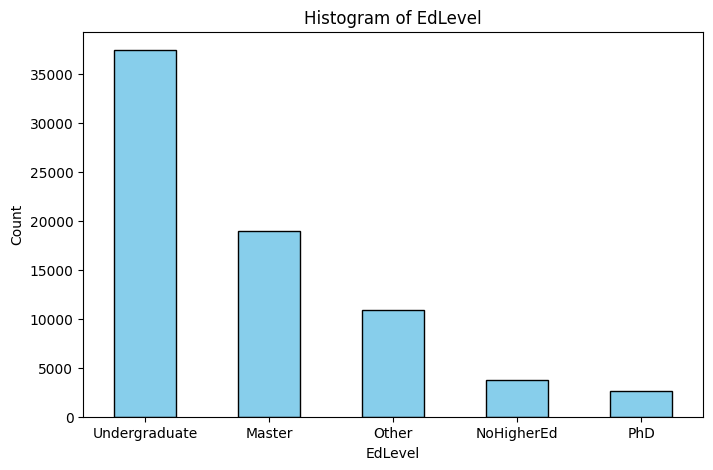

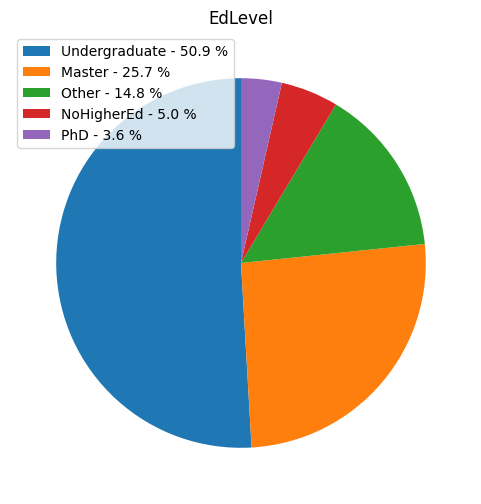

Employment
Employment
1    64874
0     8588
Name: count, dtype: int64


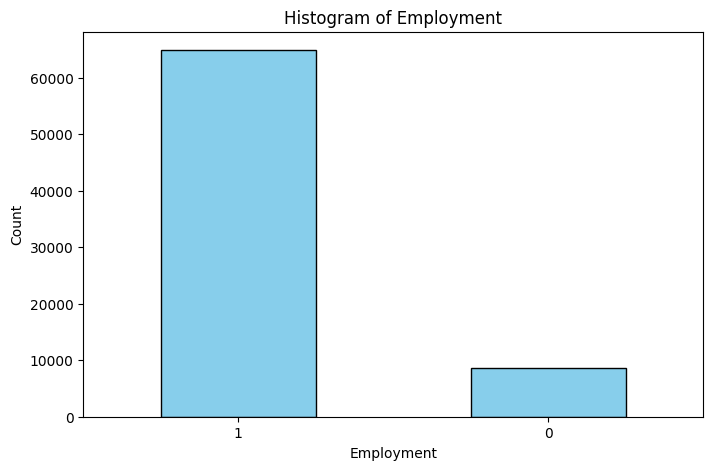

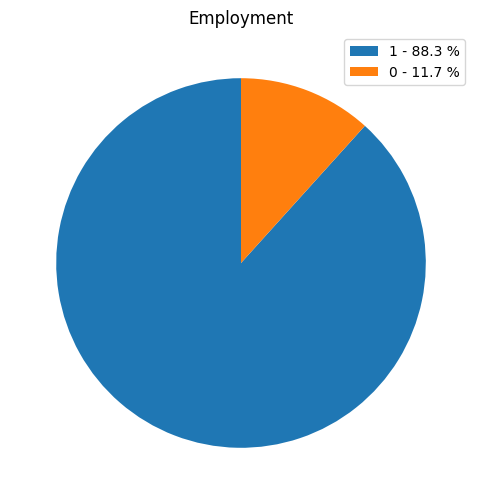

Gender
Gender
Man          68573
Woman         3518
NonBinary     1371
Name: count, dtype: int64


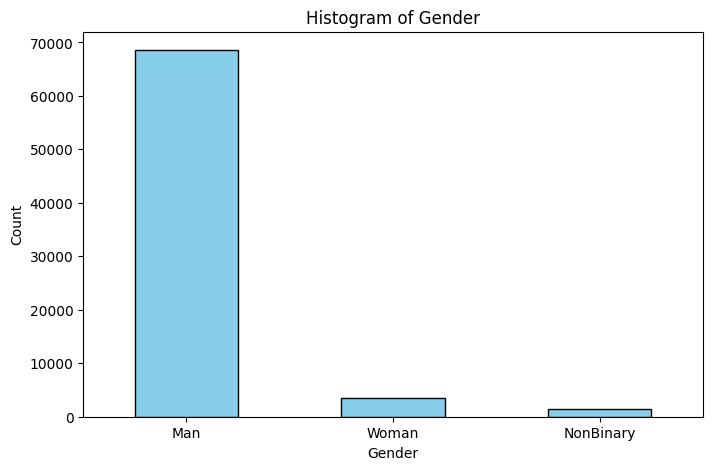

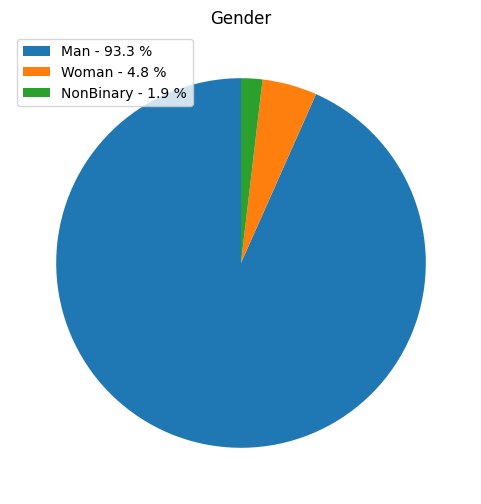

MentalHealth
MentalHealth
No     56944
Yes    16518
Name: count, dtype: int64


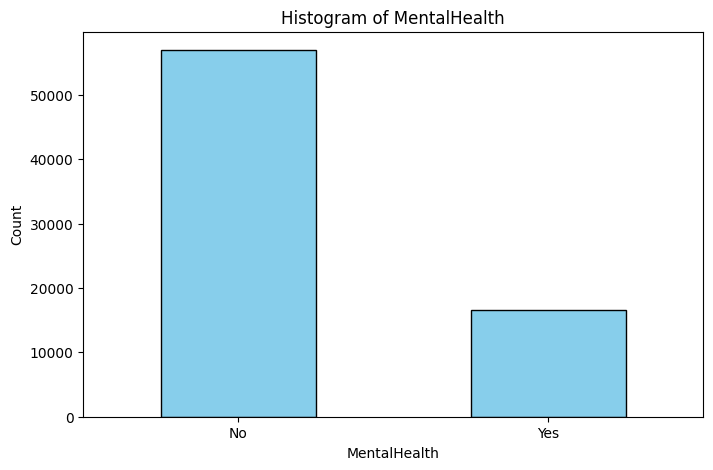

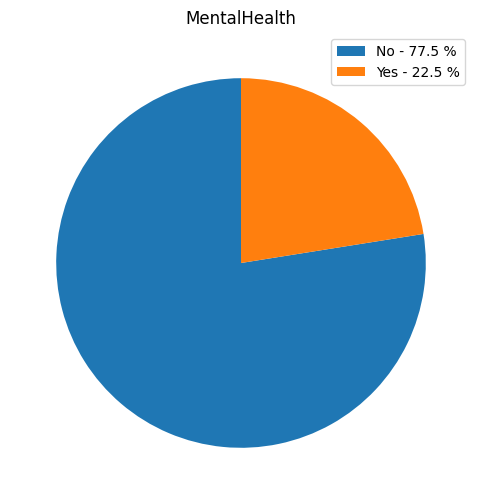

MainBranch
MainBranch
Dev       67396
NotDev     6066
Name: count, dtype: int64


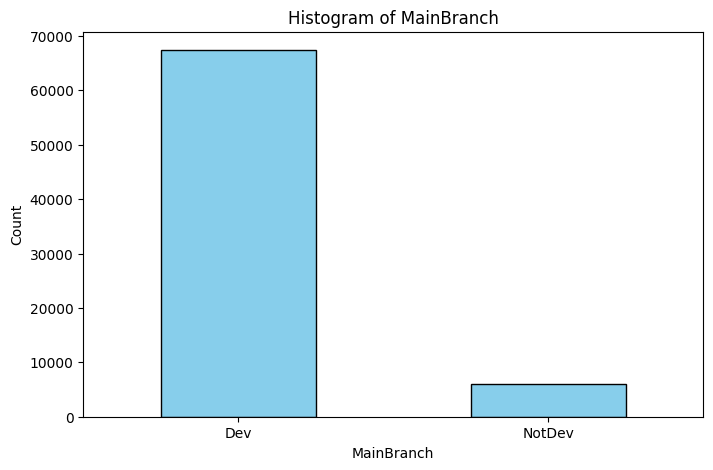

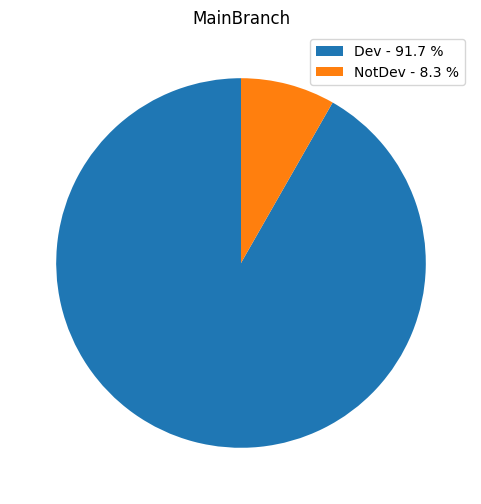

Employed
Employed
1    39392
0    34070
Name: count, dtype: int64


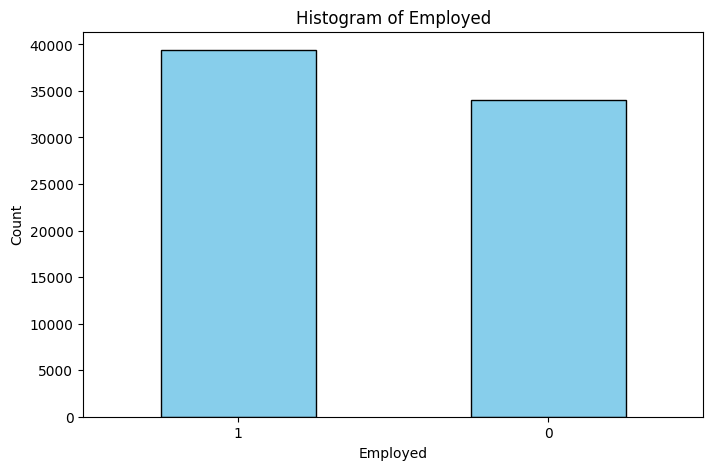

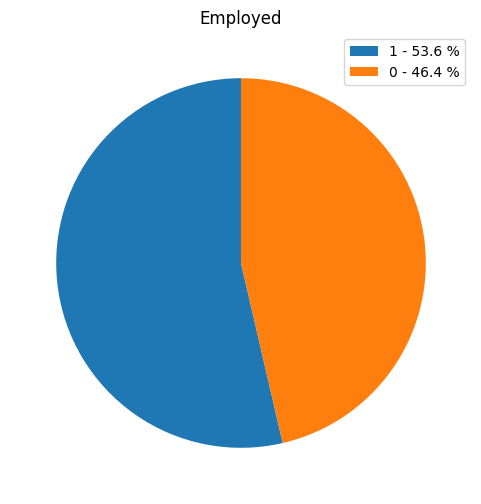

In [264]:
for column_of_interest in ['Age', 'Accessibility', 'EdLevel', 'Employment', 'Gender', 'MentalHealth', 'MainBranch', 'Employed']:
  print(column_of_interest)

  value_counts = df[column_of_interest].value_counts()
  print(value_counts)

  plt.figure(figsize=(8, 5))
  value_counts.plot(kind='bar', color='skyblue', edgecolor='black')
  plt.xlabel(column_of_interest)
  plt.ylabel('Count')
  plt.title(f'Histogram of {column_of_interest}')
  plt.xticks(rotation=0)
  plt.show()

  plt.figure(figsize=(6, 6))
  wedges, texts, autotexts = plt.pie(value_counts, autopct='', startangle=90)

  labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(value_counts.index, 100 * value_counts / value_counts.sum())]
  plt.legend(wedges, labels, loc='best')

  plt.ylabel('')
  plt.title(column_of_interest)
  plt.show()

YearsCode
10    6345
8     4606
7     4500
6     4384
5     4204
15    4142
12    3872
20    3697
9     3116
4     2848
11    2532
14    2375
13    2286
25    2140
3     1949
16    1865
30    1656
18    1646
17    1603
22    1377
2     1134
35     941
23     935
21     868
24     845
19     808
40     791
27     631
26     622
28     514
32     413
1      364
37     350
38     342
33     307
34     294
36     290
29     259
31     216
42     210
39     190
0      187
41     166
45     153
43     124
50     122
44     101
46      57
47      35
48      26
49      24
Name: count, dtype: int64


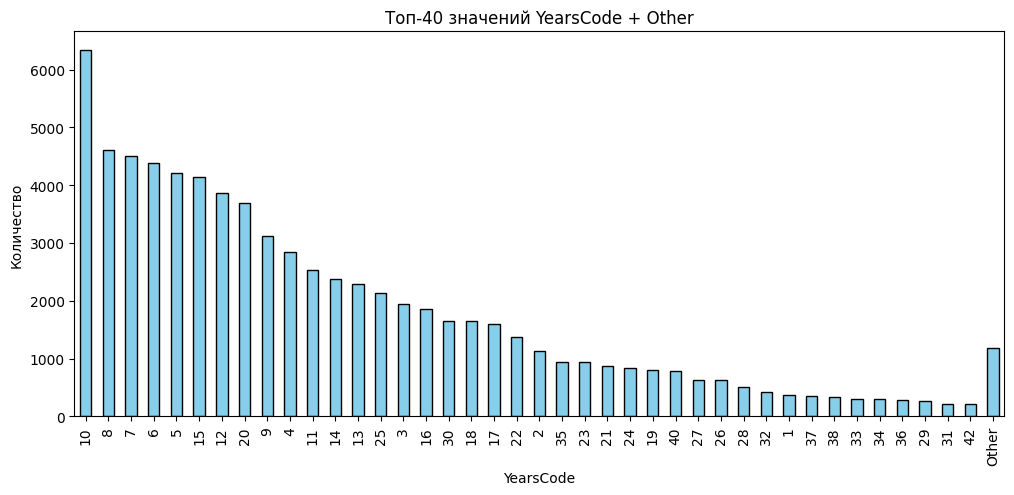

In [265]:
value_counts = df['YearsCode'].value_counts()
print(value_counts)

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('YearsCode')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений YearsCode + Other')
plt.xticks(rotation=90)
plt.show()

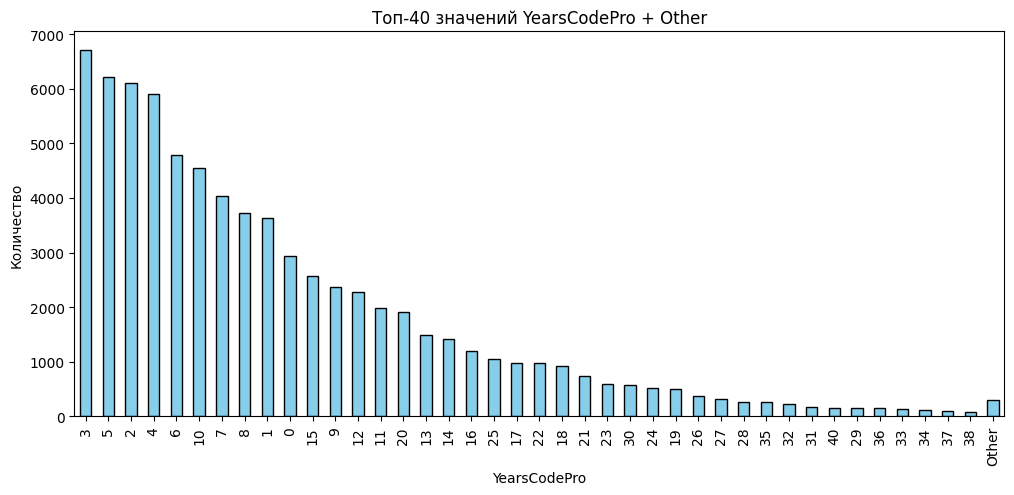

In [266]:
value_counts = df['YearsCodePro'].value_counts()

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('YearsCodePro')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений YearsCodePro + Other')
plt.xticks(rotation=90)
plt.show()

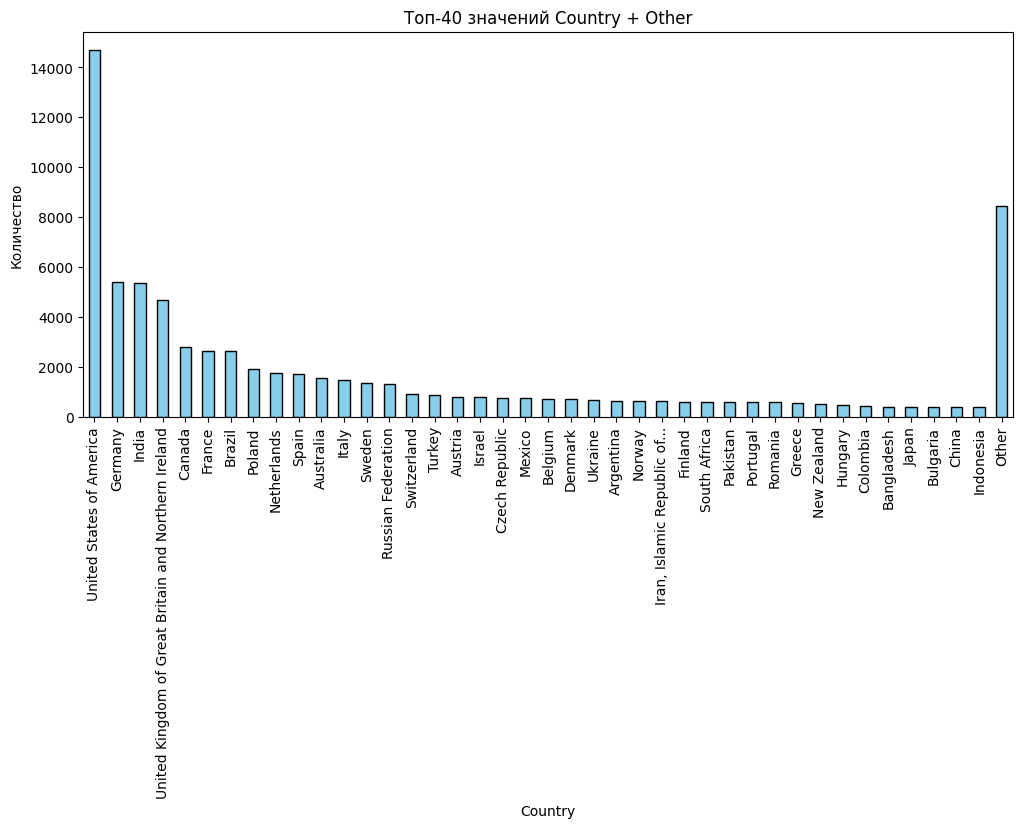

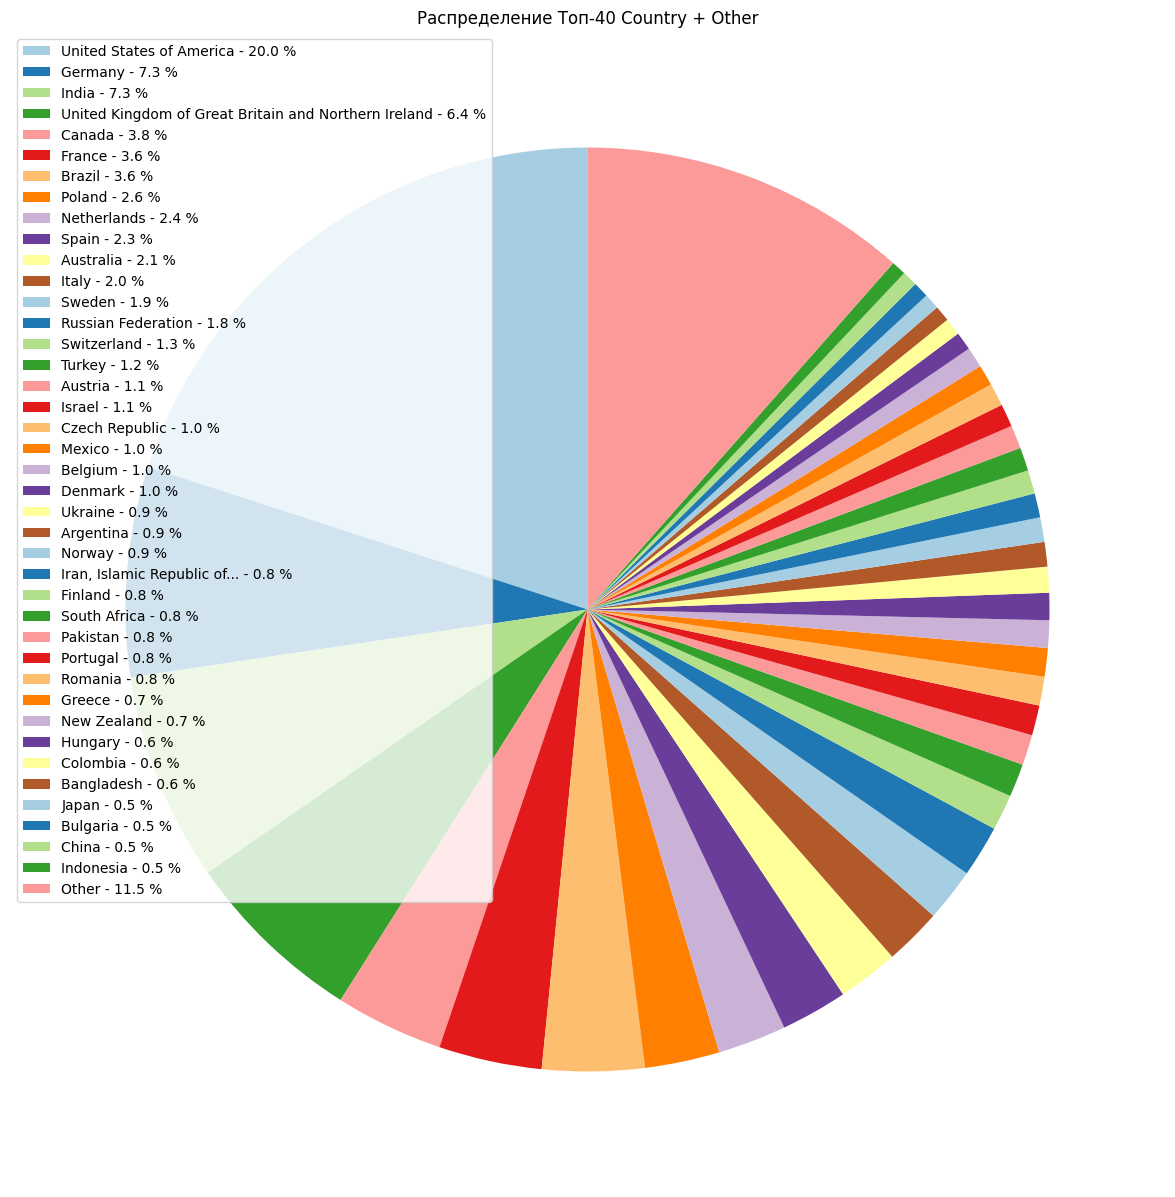

In [267]:
value_counts = df['Country'].value_counts()

top_n = 40
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Country')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений Country + Other')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15, 15))
wedges, texts, autotexts = plt.pie(top_values, autopct='', colors=plt.cm.Paired.colors, startangle=90)

labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(top_values.index, 100 * top_values / top_values.sum())]
plt.legend(wedges, labels, loc='best')

plt.ylabel('')
plt.title(f'Распределение Топ-{top_n} Country + Other')
plt.show()

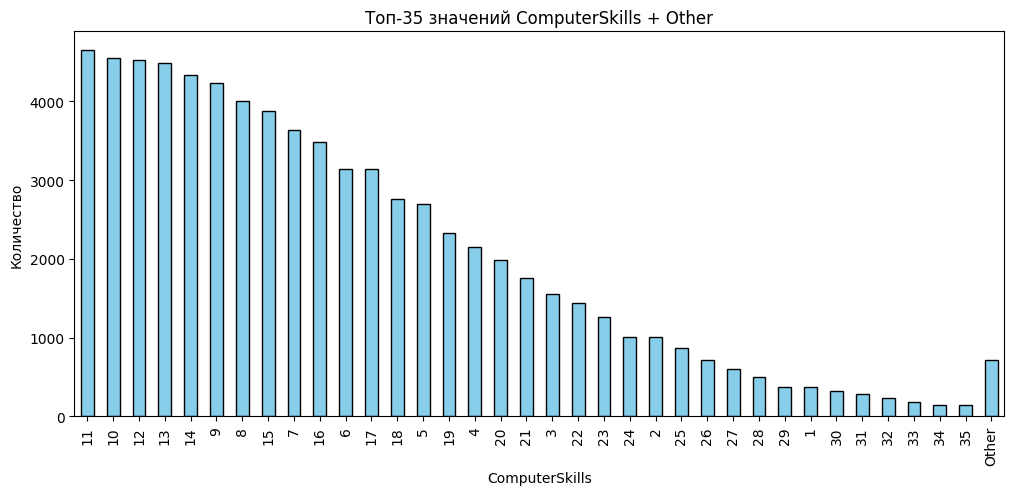

In [268]:
value_counts = df['ComputerSkills'].value_counts()

top_n = 35
top_values = value_counts.nlargest(top_n)
other_sum = value_counts.iloc[top_n:].sum()

top_values = pd.concat([top_values, pd.Series({'Other': other_sum})])

plt.figure(figsize=(12, 5))
top_values.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('ComputerSkills')
plt.ylabel('Количество')
plt.title(f'Топ-{top_n} значений ComputerSkills + Other')
plt.xticks(rotation=90)
plt.show()

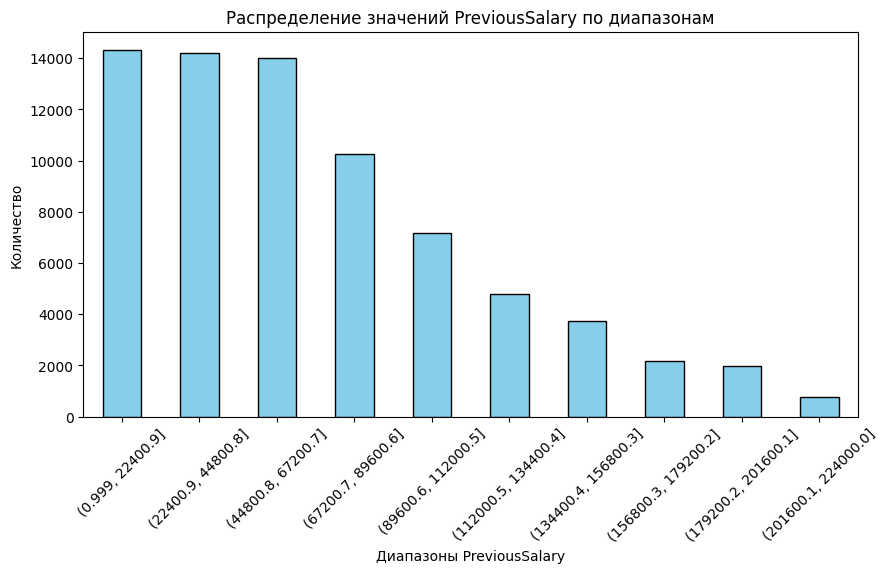

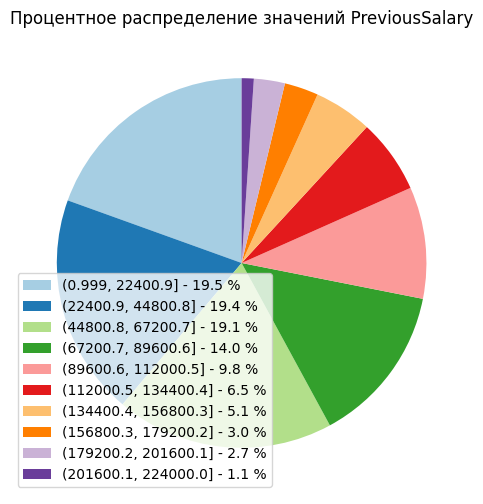

In [269]:
min_val, max_val = df['PreviousSalary'].min(), df['PreviousSalary'].max()
bins = np.linspace(min_val, max_val, 11)

temp = pd.cut(df['PreviousSalary'], bins=bins, include_lowest=True)

range_counts = temp.value_counts().sort_index()

plt.figure(figsize=(10, 5))
range_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Диапазоны PreviousSalary')
plt.ylabel('Количество')
plt.title('Распределение значений PreviousSalary по диапазонам')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(6, 6))
wedges, texts, autotexts = plt.pie(range_counts, autopct='', colors=plt.cm.Paired.colors, startangle=90)

labels = ['{0} - {1:1.1f} %'.format(i, j) for i, j in zip(range_counts.index, 100 * range_counts / range_counts.sum())]
plt.legend(wedges, labels, loc='best')

plt.ylabel('')
plt.title('Процентное распределение значений PreviousSalary')
plt.show()

HaveWorkedWith
JavaScript                     49347
Docker                         40224
HTML/CSS                       40207
SQL                            38361
Git                            35911
AWS                            31590
Python                         31159
PostgreSQL                     30102
MySQL                          29490
TypeScript                     27533
Node.js                        26043
React.js                       24695
Java                           22653
Bash/Shell                     21929
C#                             21724
Microsoft SQL Server           20105
SQLite                         19324
jQuery                         18812
Microsoft Azure                17963
MongoDB                        17283
npm                            17066
Redis                          16595
PHP                            15409
Yarn                           15303
Kubernetes                     14775
Angular                        14398
Express                

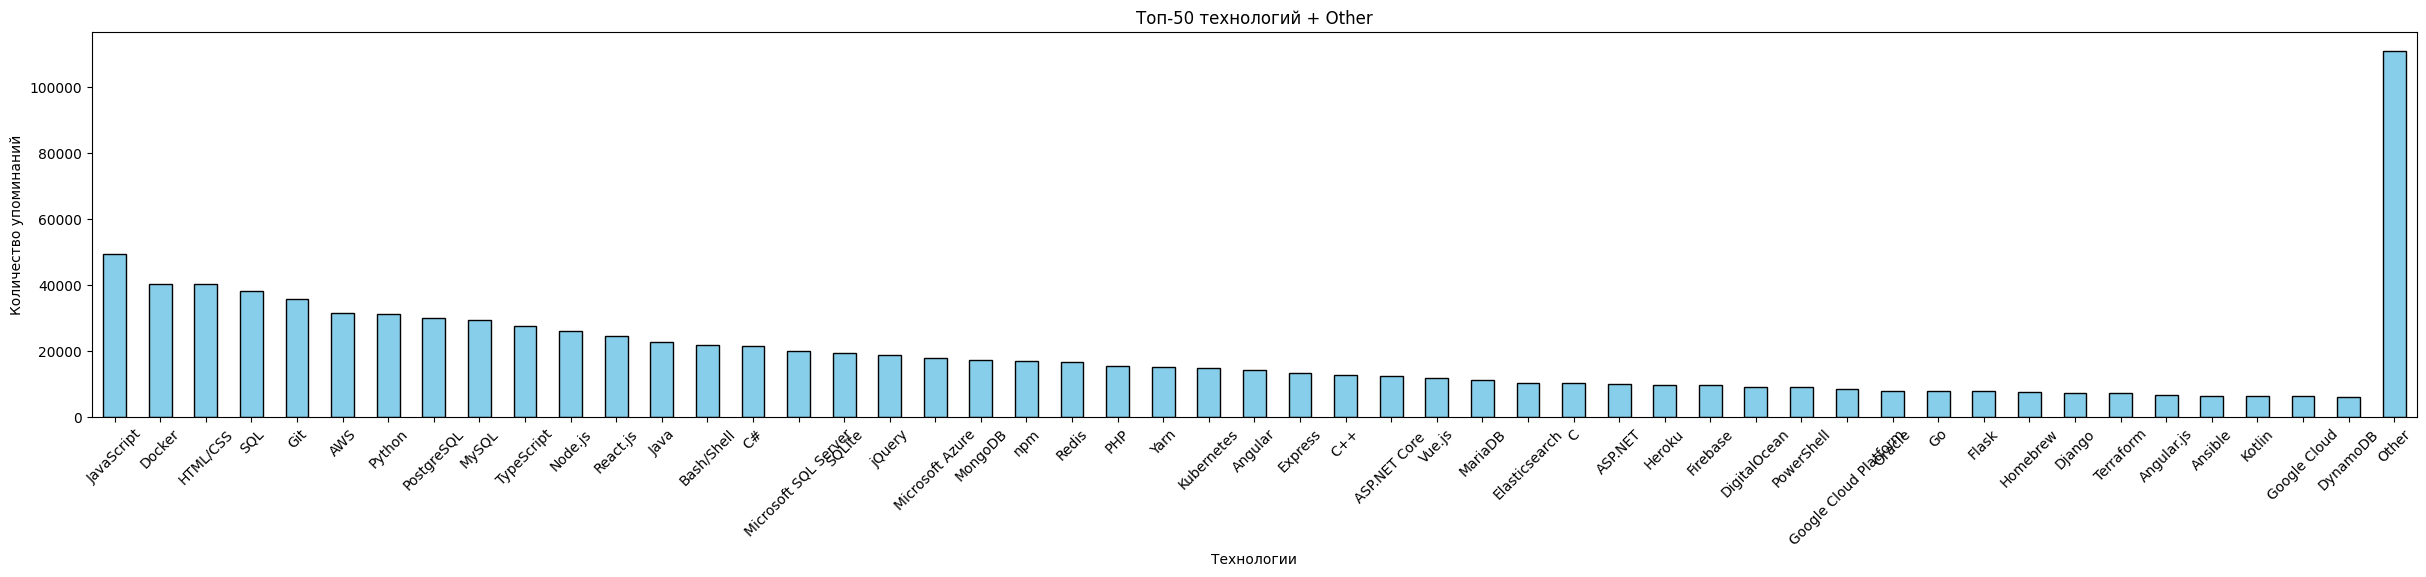

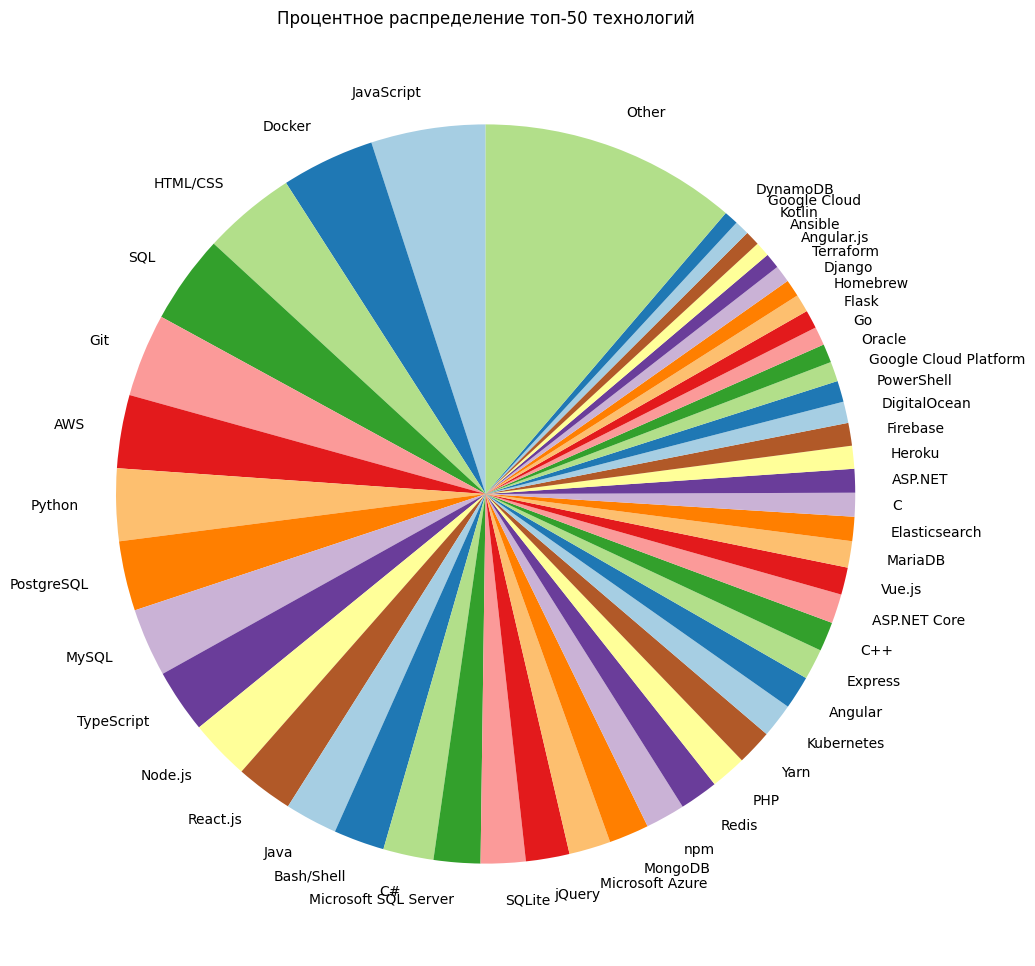

In [270]:
tech_series = df['HaveWorkedWith'].str.split(';').explode()

tech_counts = tech_series.value_counts()
print(tech_counts.to_string())

top_n = 50
top_techs = tech_counts.nlargest(top_n)
other_sum = tech_counts.iloc[top_n:].sum()

if other_sum > 0:
    top_techs = pd.concat([top_techs, pd.Series({'Other': other_sum})])

plt.figure(figsize=(30, 5))
top_techs.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Технологии')
plt.ylabel('Количество упоминаний')
plt.title(f'Топ-{top_n} технологий + Other')
plt.xticks(rotation=45)
plt.show()

# Строим круговую диаграмму
plt.figure(figsize=(12, 12))
top_techs.plot(kind='pie', colors=plt.cm.Paired.colors, startangle=90)
plt.ylabel('')
plt.title(f'Процентное распределение топ-{top_n} технологий')
plt.show()

Проверим есть ли пустые значения

In [271]:
df.isnull()

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73458,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73459,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
73460,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [272]:
df.isnull().sum()

,0
Unnamed: 0,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0


Есть 63 пустых значения в колонке "Технологии, с которыми работали"

Посчитаем сколько это будет в процентах от общего количества записей

In [273]:
(100* df.isnull().sum() / len(df))['HaveWorkedWith']

0.08575862350603033

Меньше процента

Посмотрим на эти записи

In [274]:
df[df['HaveWorkedWith'].isnull()]

,Unnamed: 0,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
1161,1161,>35,No,Undergraduate,1,Man,Yes,Dev,36,32,Switzerland,96566.0,NaN,0,0
2443,2443,>35,No,Other,1,Man,No,Dev,7,6,United States of America,85000.0,NaN,0,0
2533,2533,>35,No,PhD,1,Man,No,NotDev,37,0,Germany,76020.0,NaN,0,0
2657,2657,<35,No,Master,0,Woman,No,Dev,11,5,Portugal,31428.0,NaN,0,0
5797,5797,<35,No,Undergraduate,1,Man,No,Dev,8,4,India,70368.0,NaN,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69865,69865,<35,No,Other,1,Man,No,Dev,0,0,Colombia,6036.0,NaN,0,0
71795,71795,<35,No,Undergraduate,1,Man,No,Dev,7,3,Bangladesh,5460.0,NaN,0,0
72153,72153,>35,Yes,Other,1,Man,No,NotDev,12,2,Germany,106644.0,NaN,0,0
72588,72588,<35,No,Other,1,Man,Yes,Dev,10,6,Spain,41058.0,NaN,0,0


Вероятно, эти данные или потеряны, или не были заполнены, или заполнены некорректно так как все эти люди не трудоустроены, хотя заявлено, что они программировали профессионально какое-то количество лет. Следовательно, они должны были работать с какими-то технологиями, но в датасете этого нет. Значит, данные ошибочны

Удалим строки с пустыми значениями 'HaveWorkedWith'.

In [275]:
df.dropna(subset=['HaveWorkedWith'], inplace=True)

Проверим остались ли столбцы с пустыми значениями.

In [276]:
df.columns[df.isnull().sum() > 0]

Index([], dtype='object')

Уберем второй (дублирующийся) столбец с индексами

In [277]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [278]:
df

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Было 73462 строки. Стало 73399

# Удаление значений и их последующее восстановление для образовательных целей

Для образовательных целей удалим 5% случайных значений в колонке ComputerSkills, а потом восстановим их

In [279]:
df_copy = df.copy()

In [280]:
num_rows_to_remove = int(0.05 * len(df_copy))
rows_to_remove = random.sample(range(len(df_copy)), num_rows_to_remove)
df_copy.iloc[rows_to_remove, df_copy.columns.get_loc('ComputerSkills')] = np.nan

In [281]:
df_copy

,Age,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,<35,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4.0,0
1,<35,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12.0,1
2,<35,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7.0,0
3,<35,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13.0,0
4,>35,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,<35,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13.0,1
73458,>35,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11.0,1
73459,<35,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12.0,1
73460,<35,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15.0,1


In [282]:
df.isnull().sum()

,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0
Country,0


In [283]:
df_copy.isnull().sum()

,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0
Country,0


In [284]:
def count_skills(skills_str):
  if isinstance(skills_str, str):
    return len(skills_str.split(';'))
  else:
    return 0

df_copy['ComputerSkills'] = df_copy['ComputerSkills'].fillna(df_copy['HaveWorkedWith'].apply(count_skills))

In [285]:
df_copy.isnull().sum()

,0
Age,0
Accessibility,0
EdLevel,0
Employment,0
Gender,0
MentalHealth,0
MainBranch,0
YearsCode,0
YearsCodePro,0
Country,0


In [286]:
removed_rows_indices = df_copy[df_copy.index.isin(rows_to_remove)].index

original_values = df.loc[removed_rows_indices, 'ComputerSkills']
restored_values = df_copy.loc[removed_rows_indices, 'ComputerSkills']

correct_restorations = (original_values == restored_values).sum()
total_restorations = len(original_values)
accuracy = (correct_restorations / total_restorations) * 100

print(f"Процент правильно восстановленных значений: {accuracy:.2f}%")

Процент правильно восстановленных значений: 100.00%


# Преобразование категориальных столбцов в числовые

Теперь будем преобразовывать категориальные столбцы в числовые для дальнейшей работы

Преобразовываем столбец "Age"

In [287]:
df['Age'] = df['Age'].apply(lambda x: 1 if x == '<35' else 0)
df.rename(columns={'Age': 'Age: <35 Years'}, inplace=True)

In [288]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,No,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,No,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,No,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,No,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,No,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,No,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,No,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,No,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,Yes,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "Accessibility"

In [289]:
df['Accessibility'] = df['Accessibility'].apply(lambda x: 1 if x == 'Yes' else 0)

In [290]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,0,Master,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,Undergraduate,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,0,Master,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,0,Undergraduate,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,0,PhD,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,Undergraduate,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,0,Undergraduate,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,0,Undergraduate,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,1,Undergraduate,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "EdLevel"

In [291]:
education_mapping = {
    'NoHigherEd': 0,
    'Undergraduate': 1,
    'Master': 2,
    'PhD': 3,
    'Other': 4
}
df['EdLevel'] = df['EdLevel'].map(education_mapping)

In [292]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,Gender,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed
0,1,0,2,1,Man,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0
1,1,0,1,1,Man,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1
2,1,0,2,1,Man,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0
3,1,0,1,1,Man,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0
4,0,0,3,0,Man,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,Man,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1
73458,0,0,1,1,Man,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1
73459,1,0,1,1,Man,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1
73460,1,1,1,1,Man,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1


Преобразовываем столбец "Gender"

Для удобства заменим значение 'NonBinary' в столбце 'Gender' на 'Other'

In [293]:
df['Gender'] = df['Gender'].replace('NonBinary', 'Other')

In [294]:
df = pd.get_dummies(df, columns=['Gender'], prefix='Gender', dtype=int)

In [295]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,No,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,1,0,0
1,1,0,1,1,No,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,1,0,0
2,1,0,2,1,No,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,1,0,0
3,1,0,1,1,No,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,1,0,0
4,0,0,3,0,No,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,No,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,1,0,0
73458,0,0,1,1,No,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,1,0,0
73459,1,0,1,1,No,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,1,0,0
73460,1,1,1,1,Yes,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,1,0,0


Преобразовываем столбец "MentalHealth"

In [296]:
df['MentalHealth'] = df['MentalHealth'].apply(lambda x: 1 if x == 'Yes' else 0)

In [297]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,0,Dev,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,1,0,0
1,1,0,1,1,0,Dev,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,1,0,0
2,1,0,2,1,0,Dev,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,1,0,0
3,1,0,1,1,0,Dev,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,1,0,0
4,0,0,3,0,0,NotDev,40,30,Singapore,160932.0,C++;Python,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,Dev,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,1,0,0
73458,0,0,1,1,0,Dev,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,1,0,0
73459,1,0,1,1,0,Dev,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,1,0,0
73460,1,1,1,1,1,Dev,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,1,0,0


Преобразовываем столбец "MainBranch"

In [298]:
df['MainBranch'] = df['MainBranch'].apply(lambda x: 1 if x == 'Dev' else 0)

In [299]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,Country,PreviousSalary,HaveWorkedWith,ComputerSkills,Employed,Gender_Man,Gender_Other,Gender_Woman
0,1,0,2,1,0,1,7,4,Sweden,51552.0,C++;Python;Git;PostgreSQL,4,0,1,0,0
1,1,0,1,1,0,1,12,5,Spain,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,12,1,1,0,0
2,1,0,2,1,0,1,15,6,Germany,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,7,0,1,0,0
3,1,0,1,1,0,1,9,6,Canada,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,13,0,1,0,0
4,0,0,3,0,0,0,40,30,Singapore,160932.0,C++;Python,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,Germany,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,13,1,1,0,0
73458,0,0,1,1,0,1,21,16,United States of America,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,11,1,1,0,0
73459,1,0,1,1,0,1,4,3,Nigeria,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,12,1,1,0,0
73460,1,1,1,1,1,1,5,1,United States of America,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,15,1,1,0,0


Преобразовываем столбец "Country"

In [300]:
threshold = 500 # Определяем порог для "редких" стран
country_counts = df['Country'].value_counts()
rare_countries = country_counts[country_counts < threshold].index
df['Country'] = df['Country'].apply(lambda x: 'Other' if x in rare_countries else x)
df = pd.get_dummies(df, columns=['Country'], prefix='Country', dtype=int)

In [301]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,HaveWorkedWith,...,Country_Romania,Country_Russian Federation,Country_South Africa,Country_Spain,Country_Sweden,Country_Switzerland,Country_Turkey,Country_Ukraine,Country_United Kingdom of Great Britain and Northern Ireland,Country_United States of America
0,1,0,2,1,0,1,7,4,51552.0,C++;Python;Git;PostgreSQL,...,0,0,0,0,1,0,0,0,0,0
1,1,0,1,1,0,1,12,5,46482.0,Bash/Shell;HTML/CSS;JavaScript;Node.js;SQL;Typ...,...,0,0,0,1,0,0,0,0,0,0
2,1,0,2,1,0,1,15,6,77290.0,C;C++;Java;Perl;Ruby;Git;Ruby on Rails,...,0,0,0,0,0,0,0,0,0,0
3,1,0,1,1,0,1,9,6,46135.0,Bash/Shell;HTML/CSS;JavaScript;PHP;Ruby;SQL;Gi...,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3,0,0,0,40,30,160932.0,C++;Python,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,C#;HTML/CSS;JavaScript;TypeScript;Docker;Kuber...,...,0,0,0,0,0,0,0,0,0,0
73458,0,0,1,1,0,1,21,16,115000.0,C#;HTML/CSS;Java;JavaScript;npm;ASP.NET Core ;...,...,0,0,0,0,0,0,0,0,0,1
73459,1,0,1,1,0,1,4,3,57720.0,HTML/CSS;JavaScript;TypeScript;Docker;Express;...,...,0,0,0,0,0,0,0,0,0,0
73460,1,1,1,1,1,1,5,1,70000.0,C#;HTML/CSS;JavaScript;SQL;TypeScript;npm;Yarn...,...,0,0,0,0,0,0,0,0,0,1


Преобразовываем столбец "HaveWorkedWith"

In [302]:
# Обработка столбца 'HaveWorkedWith'
from collections import defaultdict

tech_counts = defaultdict(int)
for tech_list in df['HaveWorkedWith'].dropna():
    for tech in tech_list.split(';'):
        tech_counts[tech] += 1
threshold_tech = 5000  # Порог для определения редких технологий
def replace_rare_techs(tech_list):
    if pd.isna(tech_list):
        return tech_list
    techs = tech_list.split(';')
    techs = [tech if tech_counts[tech] >= threshold_tech else 'Other' for tech in techs]
    return ';'.join(techs)
df['HaveWorkedWith'] = df['HaveWorkedWith'].apply(replace_rare_techs)
technologies = set(tech for tech, count in tech_counts.items() if count >= threshold_tech)
technologies.add('Other')
tech_data = {f'Tech_{tech}': df['HaveWorkedWith'].apply(lambda x: 1 if tech in str(x) else 0) for tech in technologies}
tech_df = pd.DataFrame(tech_data)
df = pd.concat([df, tech_df], axis=1)
df.drop(columns=['HaveWorkedWith'], inplace=True)

In [303]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Kubernetes,Tech_Heroku,Tech_MariaDB,Tech_Angular.js,Tech_PHP,Tech_Google Cloud,Tech_Git,Tech_Kotlin,Tech_AWS,Tech_Python
0,1,0,2,1,0,1,7,4,51552.0,4,...,0,0,0,0,0,0,1,0,0,1
1,1,0,1,1,0,1,12,5,46482.0,12,...,0,0,0,0,0,0,1,0,1,0
2,1,0,2,1,0,1,15,6,77290.0,7,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,0,1,9,6,46135.0,13,...,0,0,0,0,1,0,1,0,1,0
4,0,0,3,0,0,0,40,30,160932.0,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,13,...,1,0,1,0,0,0,0,0,0,0
73458,0,0,1,1,0,1,21,16,115000.0,11,...,0,0,0,0,0,0,0,0,1,0
73459,1,0,1,1,0,1,4,3,57720.0,12,...,0,1,0,0,0,0,0,0,1,0
73460,1,1,1,1,1,1,5,1,70000.0,15,...,0,0,0,0,0,0,0,0,1,0


# Удаление выбросов

Теперь выведем список столбцов, для которых существует высокая корреляция, а также высокая обратная корреляция с другими столбцами  

Корреляция между 'Age: <35 Years' и 'YearsCodePro': -0.6897


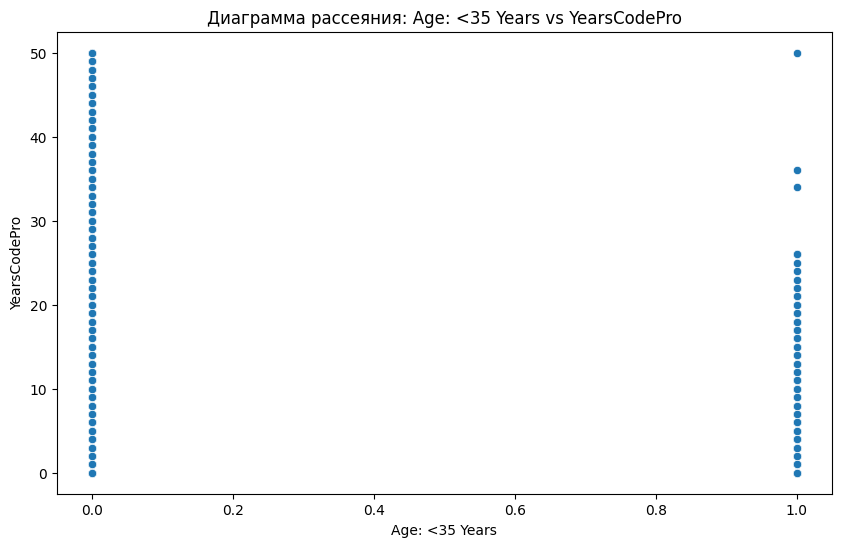


Корреляция между 'Age: <35 Years' и 'YearsCode': -0.6774


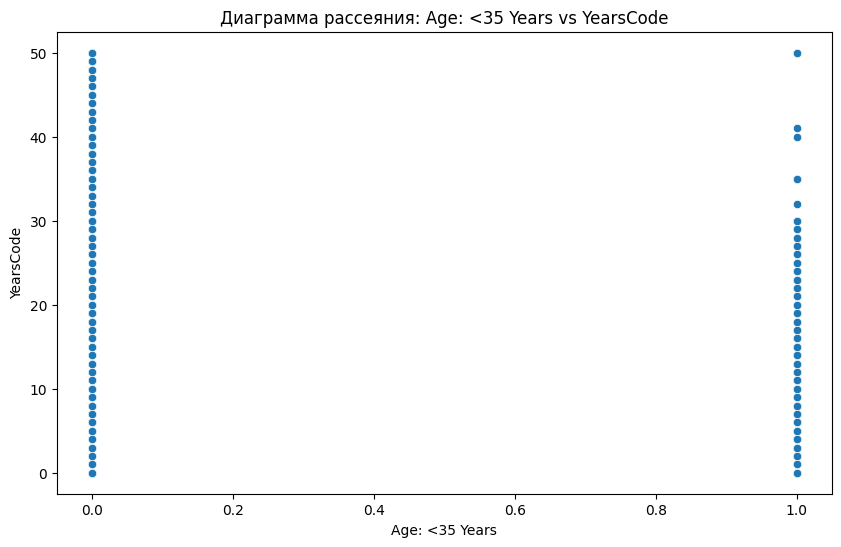


Корреляция между 'YearsCode' и 'YearsCodePro': 0.9012


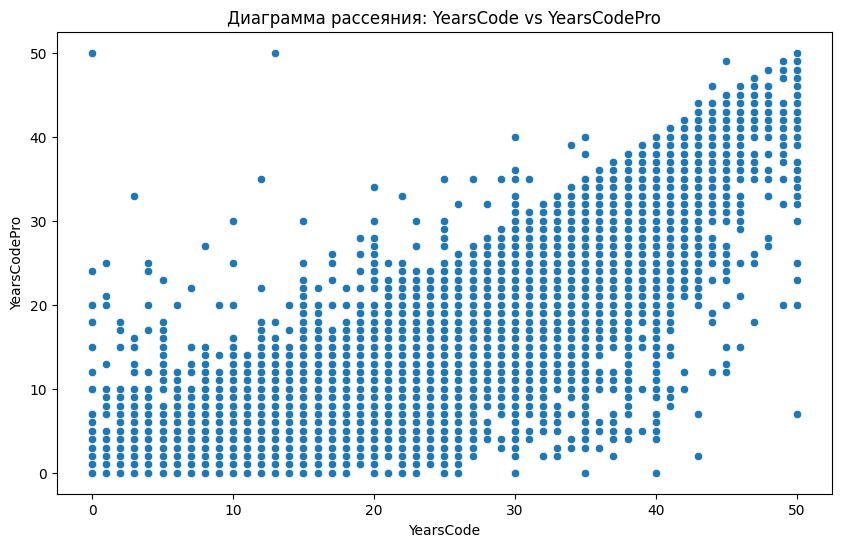


Корреляция между 'PreviousSalary' и 'Country_United States of America': 0.5662


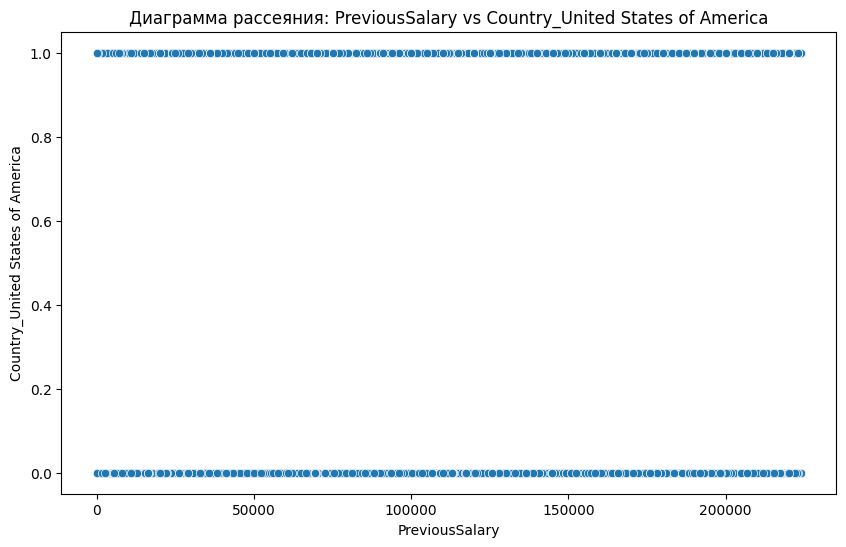


Корреляция между 'ComputerSkills' и 'Employed': 0.5850


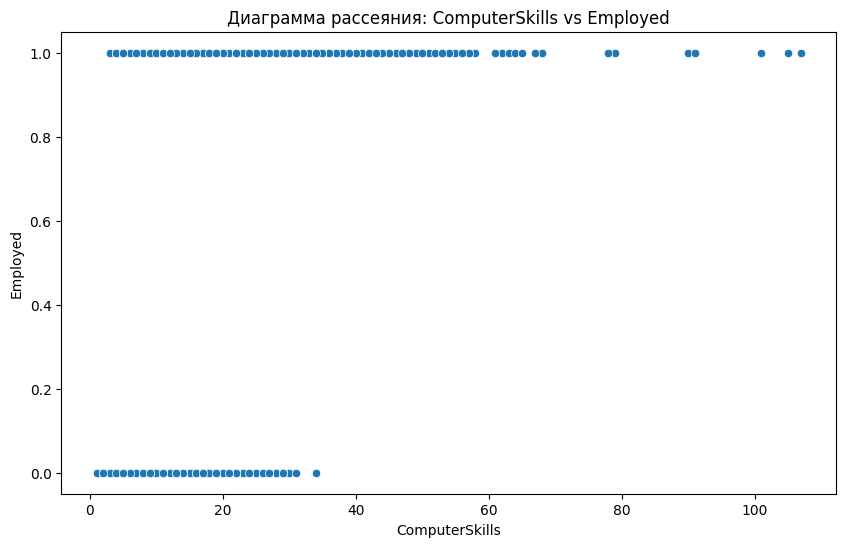

In [304]:
# Фильтруем корреляции, которые больше 0.5 или меньше -0.5
filtr_corr = df.corr()[(df.corr() > 0.5) | (df.corr() < -0.5)]

# Устанавливаем значения на главной диагонали в NaN
np.fill_diagonal(filtr_corr.values, np.nan)

# Получаем уникальные названия столбцов, которые имеют хотя бы одну корреляцию
columns_with_high_corr = filtr_corr.columns[filtr_corr.notna().any()]

# Множество для хранения уже выведенных пар
seen_pairs = set()

# Проходим по каждому столбцу и выводим корреляции
for column in columns_with_high_corr:
    correlations = df.corr()[column].loc[lambda x: (x > 0.5) | (x < -0.5)].sort_values().drop(column)

    for correlated_column, value in correlations.items():
        # Создаем упорядоченную пару для избежания дублирования
        pair = tuple(sorted([column, correlated_column]))

        if pair not in seen_pairs:
            # Проверяем, являются ли оба столбца бинарными или булевыми
            if (df[column].nunique() == 2 and set(df[column].unique()).issubset({0, 1})) and \
               (df[correlated_column].nunique() == 2 and set(df[correlated_column].unique()).issubset({0, 1})):
                continue  # Пропускаем пары, где оба столбца бинарные/булевые

            seen_pairs.add(pair)
            print(f"Корреляция между '{column}' и '{correlated_column}': {value:.4f}")

            # Создаем диаграмму рассеяния
            plt.figure(figsize=(10, 6))
            sns.scatterplot(x=df[column], y=df[correlated_column])

            # Добавляем заголовок и метки осей
            plt.title(f'Диаграмма рассеяния: {column} vs {correlated_column}')
            plt.xlabel(column)
            plt.ylabel(correlated_column)

            # Отображаем график
            plt.show()
            print()  # Пустая строка для разделения выводов

Из представленных диаграмм рассеивания нам интересны все, кроме 'PreviousSalary' vs 'Country_United States of America'.

Как видно по диаграмме рассеивания 'Age: <35 Years' vs 'YearsCodePro' выбросы наблюдаются

In [305]:
df[(df['Age: <35 Years']==1) & (df['YearsCodePro']>30)]

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Kubernetes,Tech_Heroku,Tech_MariaDB,Tech_Angular.js,Tech_PHP,Tech_Google Cloud,Tech_Git,Tech_Kotlin,Tech_AWS,Tech_Python
26491,1,0,1,1,0,1,20,34,47400.0,20,...,0,0,0,0,0,0,1,1,0,1
34790,1,0,1,0,1,1,50,50,9996.0,10,...,0,1,0,0,0,0,1,0,1,1
57970,1,1,2,1,1,1,40,36,158484.0,41,...,0,0,0,0,1,0,0,1,0,1


Как видно из выводы, опрошенным меньше 35 лет, однако они утверждают, что профессионально программируют на протяжении 34+ лет. Чтож, верится с трудом. Разумно будет удалить эти строки.

In [306]:
df = df[~((df['Age: <35 Years'] == 1) & (df['YearsCodePro'] > 30))]

<Axes: xlabel='Age: <35 Years', ylabel='YearsCodePro'>

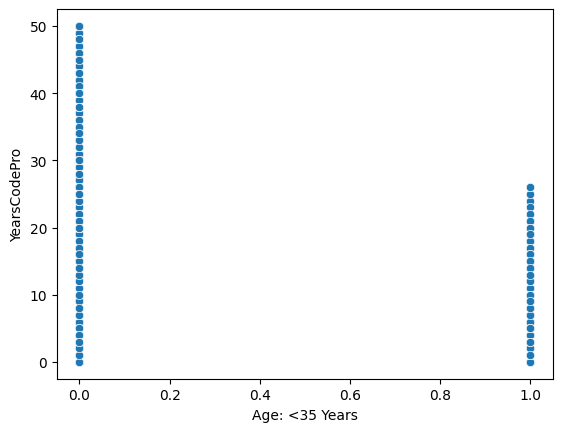

In [307]:
sns.scatterplot(x='Age: <35 Years',y='YearsCodePro',data=df)

Выбросы пропали.

In [308]:
df[(df['Age: <35 Years']==1) & (df['YearsCode']>30)]

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Kubernetes,Tech_Heroku,Tech_MariaDB,Tech_Angular.js,Tech_PHP,Tech_Google Cloud,Tech_Git,Tech_Kotlin,Tech_AWS,Tech_Python
1788,1,0,1,1,1,1,32,10,79000.0,8,...,0,0,0,0,0,0,1,0,0,0
19123,1,0,4,1,0,1,35,16,147276.0,18,...,0,0,0,0,0,0,1,0,1,1
52503,1,0,2,1,0,1,50,20,64500.0,4,...,0,0,0,0,0,0,0,0,1,0
58907,1,0,2,1,0,1,35,26,126000.0,17,...,0,0,0,0,0,0,0,1,0,1
62254,1,0,0,1,1,1,41,8,17916.0,1,...,0,0,0,0,0,0,0,0,0,0


Как видим в случае с обычным программированием также есть выбросы, в которых опрашиваемые утверждают, что им меньше 35 лет, но они программируют 32+ года. Верится с трудом. Удалим эти строки.

In [309]:
df = df[~((df['Age: <35 Years'] == 1) & (df['YearsCode'] > 30))]

<Axes: xlabel='Age: <35 Years', ylabel='YearsCode'>

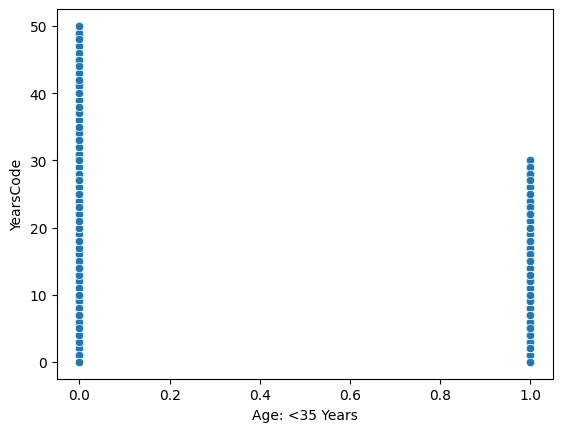

In [310]:
sns.scatterplot(x='Age: <35 Years',y='YearsCode',data=df)

Выбросы пропали.

Далее смотрим диаграмму рассеивания для стобцов YearsCode и YearsCodePro. Видимо что сверху диаграммы есть точки, выглядещие как выбросы. Проведем диагональ от точки 0:10 до точки 40:50 и построим для нее уравнение y = x + 10. Таким образом, для точки (x, y) на диаграмме, чтобы она находилась выше этой диагонали, должно выполняться следующее условие: y >= 0.75x + 20. Снизу диаграммы таккже есть точки, напоминающие выбросы. Проведем диагональ от точки 30:0 до точки 50:25. Диагональ будет иметь уравнение: y = (25/20)(x − 30) или, упрощенно: y = 1.25(x − 30). Таким образом, для точки (x, y) на диаграмме, чтобы она находилась ниже этой диагонали, должно выполняться следующее условие: y <= 1.25(x − 30).

In [311]:
# Удаляем строки, которые соответсвуют заданным диапазонамм
df = df[~((df['YearsCodePro'] >= df['YearsCode'] + 10) |
           (df['YearsCodePro'] <= 1.25 * (df['YearsCode'] - 30)))]

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

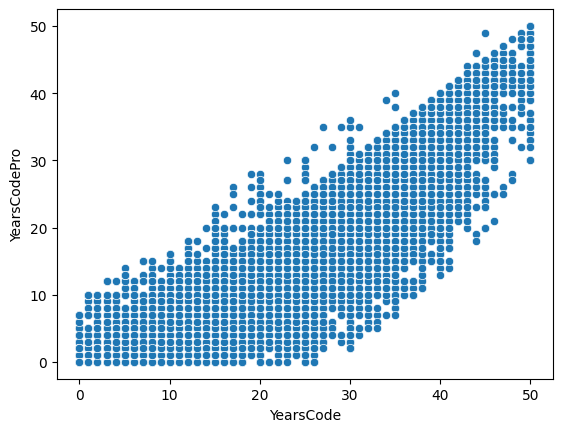

In [312]:
sns.scatterplot(x='YearsCode',y='YearsCodePro',data=df)

Избавились от выбросов.

И последняя диаграмма рассеивания для ComputerSkills и Employed. Тут также видим выбросы. Удалим их.

In [313]:
df = df[~((df['Employed'] == 1) & (df['ComputerSkills'] > 75))]

<Axes: xlabel='ComputerSkills', ylabel='Employed'>

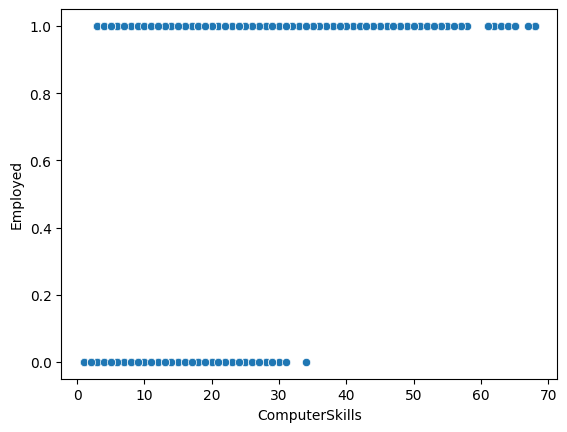

In [314]:
sns.scatterplot(x='ComputerSkills',y='Employed',data=df)

Как видно выбросов стало меньше.

# Скачивание (сохранение готового к работе датасета)

Сохраним обработанный датасет

In [315]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_Kubernetes,Tech_Heroku,Tech_MariaDB,Tech_Angular.js,Tech_PHP,Tech_Google Cloud,Tech_Git,Tech_Kotlin,Tech_AWS,Tech_Python
0,1,0,2,1,0,1,7,4,51552.0,4,...,0,0,0,0,0,0,1,0,0,1
1,1,0,1,1,0,1,12,5,46482.0,12,...,0,0,0,0,0,0,1,0,1,0
2,1,0,2,1,0,1,15,6,77290.0,7,...,0,0,0,0,0,0,1,0,0,0
3,1,0,1,1,0,1,9,6,46135.0,13,...,0,0,0,0,1,0,1,0,1,0
4,0,0,3,0,0,0,40,30,160932.0,2,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,13,...,1,0,1,0,0,0,0,0,0,0
73458,0,0,1,1,0,1,21,16,115000.0,11,...,0,0,0,0,0,0,0,0,1,0
73459,1,0,1,1,0,1,4,3,57720.0,12,...,0,1,0,0,0,0,0,0,1,0
73460,1,1,1,1,1,1,5,1,70000.0,15,...,0,0,0,0,0,0,0,0,1,0


In [316]:
#df.to_csv('stackoverflow_full_cleaned.csv')

In [317]:
#files.download('stackoverflow_full_cleaned.csv')

# Предсказания

Предсказание

Будем предсказывать стоблбец "Employed" (Employed: **target** variable, whether the applicant has been hired). Целевой для предсказания столбец. Бинарный

In [318]:
df['Employed']

,Employed
0,0
1,1
2,0
3,0
4,0
...,...
73457,1
73458,1
73459,1
73460,1


In [319]:
df['Employed'].unique()

array([0, 1])

In [320]:
X = df.drop('Employed', axis=1)
y = df['Employed']

In [321]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [322]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

**StandardScaler** - это инструмент из библиотеки scikit-learn (sklearn) в Python, который используется для **стандартизации** данных.

Стандартизация - это процесс преобразования данных таким образом, чтобы каждый признак (столбец в вашем датасете) имел **среднее значение 0 и стандартное отклонение 1**.

*StandardScaler* вычисляет среднее значение и стандартное отклонение для каждого признака в ваших тренировочных данных. Затем он использует эти значения, чтобы преобразовать данные по следующей формуле: z = (x - u) / s

где:
- z - стандартизированное значение
- x - исходное значение
- u - среднее значение признака
- s - стандартное отклонение признака

In [323]:
scaler = StandardScaler()

In [324]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

*LogisticRegressionCV* - это класс из библиотеки scikit-learn в Python, который используется для построения модели логистической регрессии с **встроенной кросс-валидацией** для оптимизации **гиперпараметра C**.

- **Логистическая регрессия:** это алгоритм машинного обучения, который используется для решения задач **бинарной классификации**, то есть когда нужно разделить данные на две группы (например, "спам" или "не спам").

- **Гиперпараметр C:** это параметр, **который контролирует силу регуляризации** в модели логистической регрессии. Регуляризация помогает предотвратить переобучение модели, то есть когда модель слишком хорошо подстраивается под тренировочные данные и плохо работает на новых данных.

- **Кросс-валидация:** это метод оценки качества модели, который заключается в том, чтобы разделить данные на несколько частей (фолдов), обучать модель на части данных и проверять ее на оставшейся части. Этот процесс повторяется для всех фолдов, и в итоге получается оценка качества модели, которая **менее подвержена случайным факторам.**

1. **C (обратная сила регуляризации)**  
   - **Описание**: Контролирует силу регуляризации. Меньшие значения → сильная регуляризация (меньше переобучения, но меньше точность). Большие значения → слабая регуляризация (лучше подгонка, больше риск переобучения).  
   - **Значение по умолчанию**: `Cs=10` (список из 10 значений C, выбранных в логарифмическом масштабе от 1e-4 до 1e4).  

2. **penalty (тип регуляризации)**  
   - **Описание**: Указывает тип регуляризации. Возможные значения:  
     - 'l1': L1 регуляризация (Lasso)  
     - 'l2': L2 регуляризация (Ridge)  
     - 'elasticnet': комбинация L1 и L2  
     - 'none': без регуляризации  
   - **Значение по умолчанию**: 'l2'  

3. **solver (алгоритм оптимизации)**  
   - **Описание**: Указывает алгоритм оптимизации для нахождения оптимальных параметров модели.
   - **Значение по умолчанию**: 'lbfgs' (алгоритм Бройдена-Флетчера-Гольдфарба-Шанно)


In [325]:
from sklearn.linear_model import LogisticRegressionCV , LogisticRegression

In [326]:
log_model = LogisticRegressionCV()

Считает минуты две. Нужно подождать

In [327]:
# Считает минуты 2
log_model.fit(scaled_X_train,y_train)

LogisticRegressionCV()

In [328]:
log_model.C_

array([2.7825594])

<Axes: xlabel='None'>

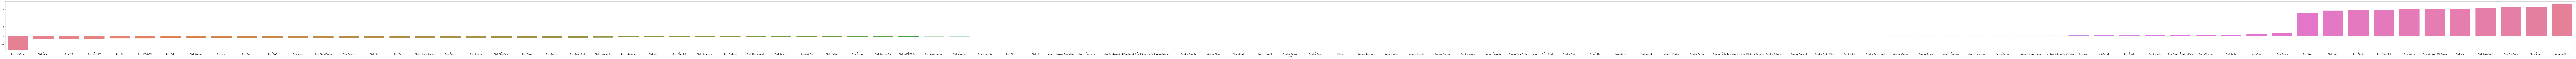

In [329]:
coef = pd.Series(data=log_model.coef_[0], index=X.columns)
coef = coef.sort_values()
plt.figure(figsize=(250, 5))
sns.barplot(x=coef.index, y=coef.values, hue=coef.index, legend=False)

In [330]:
log_model.coef_

array([[ 1.49540617e-01,  7.40592064e-03, -2.24614021e-02,
         9.57743723e-03, -5.19335669e-02,  7.79126453e-02,
         2.99796594e-01, -2.92937332e-01,  3.67286240e-02,
         7.39862527e+00,  6.56263200e-03, -5.63217150e-02,
         2.79502048e-02,  3.37333084e-02, -6.96702863e-02,
        -4.97523361e-03,  1.99453213e-02, -3.01462249e-02,
        -5.68257300e-02,  1.88773881e-03, -1.88194341e-02,
         1.20408110e-02,  5.69972347e-03,  6.68578440e-02,
        -3.65916303e-02,  9.11353967e-02,  5.71839715e-02,
        -6.53628846e-02,  2.68635235e-02,  1.12751998e-02,
         1.90595136e-02, -3.61831987e-03, -8.22810758e-03,
        -1.80593121e-02, -1.64149652e-02, -3.68655289e-02,
         2.03663696e-02,  3.35136108e-02, -7.11562969e-02,
         2.23436271e-02,  4.00143478e-02, -1.33973032e-02,
         2.68749200e-02,  3.08843553e-02, -6.94540694e-02,
        -6.94293600e-02,  1.95317737e-02,  9.08659769e-02,
         5.94790249e+00, -6.20217190e-01, -2.76572670e-0

In [331]:
for coef in log_model.coef_[0]:
    print(f"{coef: >20.10f}")

        0.1495406166
        0.0074059206
       -0.0224614021
        0.0095774372
       -0.0519335669
        0.0779126453
        0.2997965942
       -0.2929373319
        0.0367286240
        7.3986252663
        0.0065626320
       -0.0563217150
        0.0279502048
        0.0337333084
       -0.0696702863
       -0.0049752336
        0.0199453213
       -0.0301462249
       -0.0568257300
        0.0018877388
       -0.0188194341
        0.0120408110
        0.0056997235
        0.0668578440
       -0.0365916303
        0.0911353967
        0.0571839715
       -0.0653628846
        0.0268635235
        0.0112751998
        0.0190595136
       -0.0036183199
       -0.0082281076
       -0.0180593121
       -0.0164149652
       -0.0368655289
        0.0203663696
        0.0335136108
       -0.0711562969
        0.0223436271
        0.0400143478
       -0.0133973032
        0.0268749200
        0.0308843553
       -0.0694540694
       -0.0694293600
        0.0195317737
        0.090

Посмотрим на шансы

In [332]:
np.exp(log_model.coef_[0])

array([1.16130064e+00, 1.00743341e+00, 9.77788977e-01, 1.00962345e+00,
       9.49391936e-01, 1.08102822e+00, 1.34958427e+00, 7.46068894e-01,
       1.03741145e+00, 1.63373693e+03, 1.00658421e+00, 9.45234991e-01,
       1.02834448e+00, 1.03430873e+00, 9.32701294e-01, 9.95037122e-01,
       1.02014556e+00, 9.70303641e-01, 9.44758698e-01, 1.00188952e+00,
       9.81356546e-01, 1.01211359e+00, 1.00571600e+00, 1.06914348e+00,
       9.64069752e-01, 1.09541731e+00, 1.05885059e+00, 9.36727478e-01,
       1.02722760e+00, 1.01133900e+00, 1.01924231e+00, 9.96388218e-01,
       9.91805651e-01, 9.82102780e-01, 9.83719026e-01, 9.63805731e-01,
       1.02057518e+00, 1.03408152e+00, 9.31316319e-01, 1.02259512e+00,
       1.04082571e+00, 9.86692041e-01, 1.02723931e+00, 1.03136622e+00,
       9.32902981e-01, 9.32926033e-01, 1.01972377e+00, 1.09512222e+00,
       3.82949255e+02, 5.37827614e-01, 7.58378505e-01, 7.23390451e+02,
       3.33666708e+02, 5.79163701e-01, 9.15638462e-01, 7.52647836e+02,
      

In [333]:
for coef in log_model.coef_[0]:
    print(f"{np.exp(coef): >20.10f}")

        1.1613006379
        1.0074334123
        0.9777889770
        1.0096234477
        0.9493919358
        1.0810282217
        1.3495842664
        0.7460688940
        1.0374114541
     1633.7369322223
        1.0065842132
        0.9452349907
        1.0283444766
        1.0343087285
        0.9327012936
        0.9950371224
        1.0201455583
        0.9703036406
        0.9447586981
        1.0018895217
        0.9813565458
        1.0121135934
        1.0057159978
        1.0691434822
        0.9640697518
        1.0954173111
        1.0588505908
        0.9367274777
        1.0272276007
        1.0113390044
        1.0192423056
        0.9963882184
        0.9918056506
        0.9821027800
        0.9837190262
        0.9638057307
        1.0205751792
        1.0340815183
        0.9313163189
        1.0225951155
        1.0408257077
        0.9866920413
        1.0272393077
        1.0313662249
        0.9329029812
        0.9329260330
        1.0197237667
        1.095

In [334]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [335]:
y_pred = log_model.predict(scaled_X_test)

In [336]:
accuracy_score(y_test, y_pred)

0.9830693610049154

In [337]:
confusion_matrix(y_test,y_pred)

array([[3418,   33],
       [  91, 3782]])

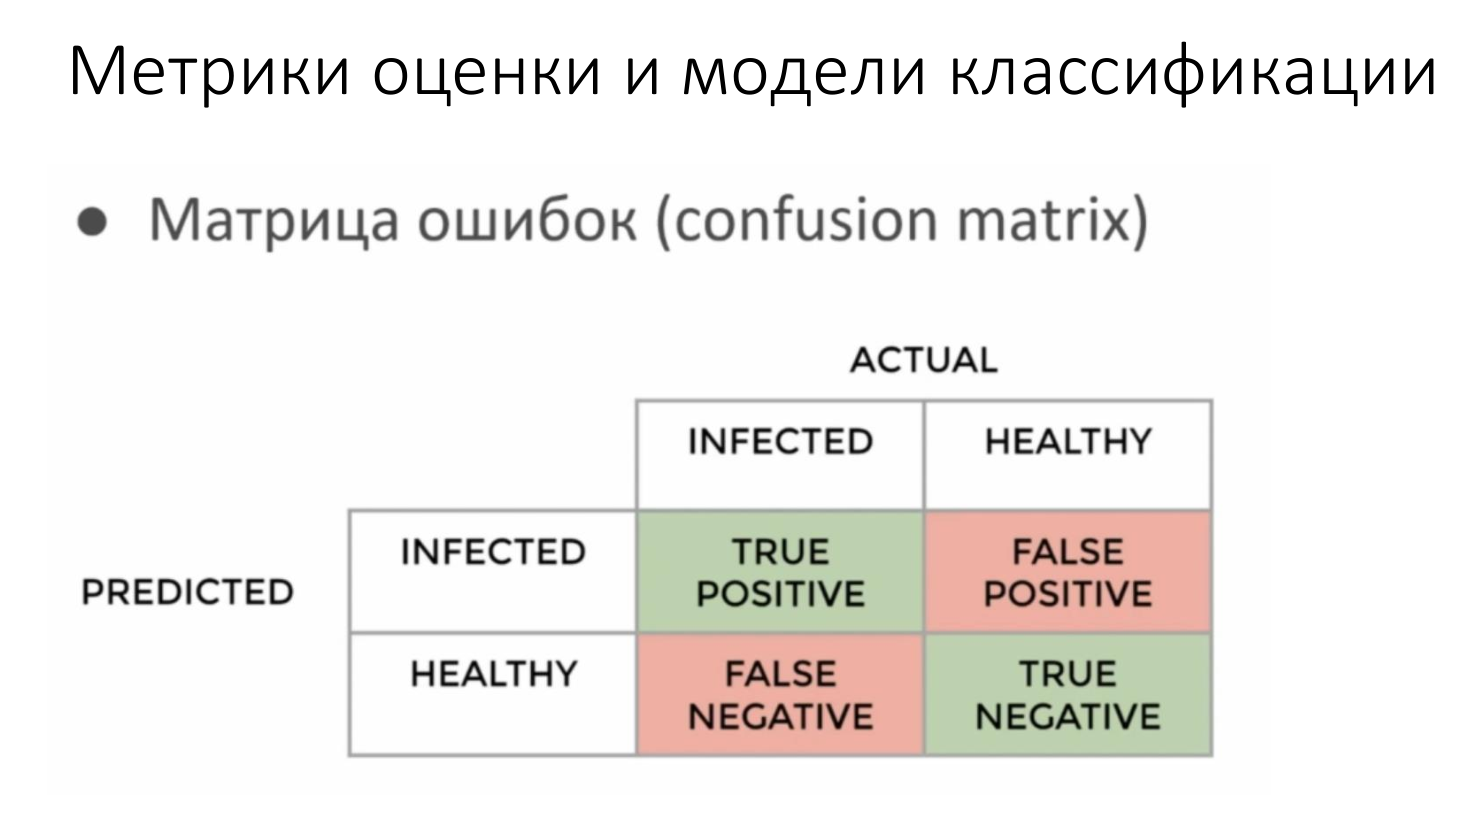

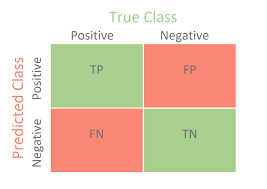

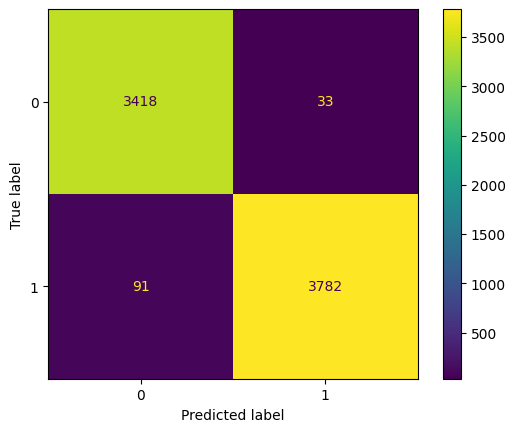

In [338]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot()
plt.show()

In [339]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      3451
           1       0.99      0.98      0.98      3873

    accuracy                           0.98      7324
   macro avg       0.98      0.98      0.98      7324
weighted avg       0.98      0.98      0.98      7324



In [340]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, RocCurveDisplay
from sklearn.metrics import roc_curve, auc

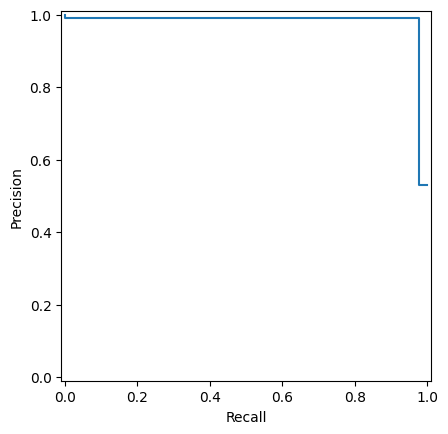

In [341]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()

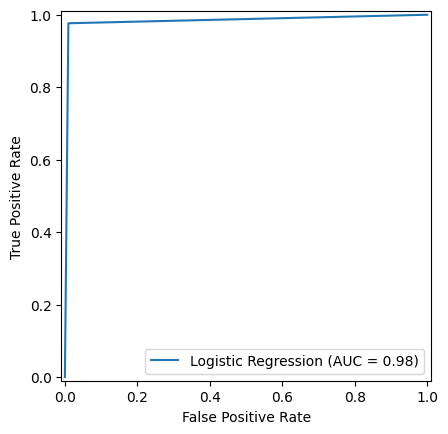

In [342]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()
plt.show()

Предсказание 2

In [343]:
df['PreviousSalary']

,PreviousSalary
0,51552.0
1,46482.0
2,77290.0
3,46135.0
4,160932.0
...,...
73457,41058.0
73458,115000.0
73459,57720.0
73460,70000.0


In [344]:
X = df.drop('PreviousSalary', axis=1)
y = df['PreviousSalary']

In [345]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [346]:
scaler = StandardScaler()

In [347]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [348]:
from sklearn.linear_model import LinearRegression

In [349]:
lin_model = LinearRegression(fit_intercept=True)

In [350]:
lin_model.fit(scaled_X_train, y_train)

LinearRegression()

In [351]:
y_pred = lin_model.predict(scaled_X_test)

In [352]:
np.sqrt(((y_test - y_pred) ** 2).mean())

30251.260643292055

# Анализ данных и сравнение их по странам

Работа

In [353]:
# Словарь соответствия столбцов и читаемых названий стран G7
g7_countries = {
    'Country_Canada': 'Canada',
    'Country_France': 'France',
    'Country_Germany': 'Germany',
    'Country_Italy': 'Italy',
    'Country_United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Country_United States of America': 'USA'
}

# Функция для определения, принадлежит ли строка к одной из стран G7
def assign_country(row):
    for col, country_name in g7_countries.items():
        if row[col] == 1:
            return country_name
    return 'Other'

# Создание новой колонки "Country_Group"
df['Country_Group'] = df.apply(assign_country, axis=1)

# Удаляем все исходные бинарные колонки стран (начинающиеся с 'Country_'), кроме новой "Country_Group"
country_columns = [col for col in df.columns if col.startswith('Country_') and col != 'Country_Group']
df.drop(columns=country_columns, inplace=True)


In [354]:
salary_avg = df.groupby('Country_Group')['PreviousSalary'].mean()
print(salary_avg)

Country_Group
Canada             86367.581530
France             55609.119849
Germany            69905.906186
Italy              42213.261077
Other              46703.776327
USA               123844.262206
United Kingdom     81161.742557
Name: PreviousSalary, dtype: float64


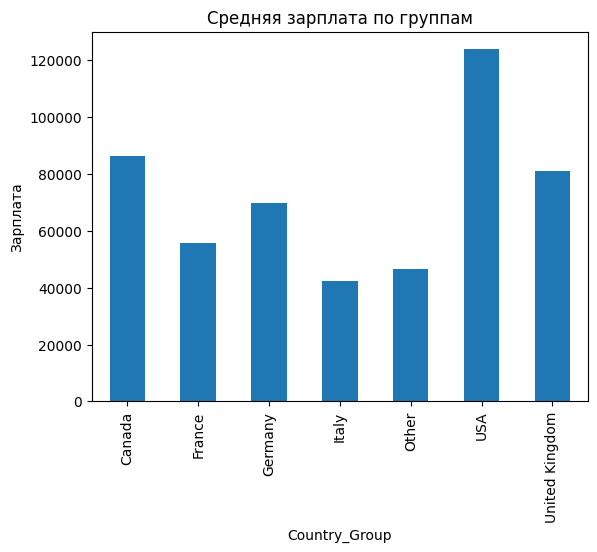

In [355]:
salary_avg.plot(kind='bar', title='Средняя зарплата по группам', ylabel='Зарплата')
plt.show()

In [356]:
employment_avg = df.groupby('Country_Group')['Employed'].mean()
print(employment_avg)

Country_Group
Canada            0.531385
France            0.514934
Germany           0.523128
Italy             0.608044
Other             0.534070
USA               0.551588
United Kingdom    0.523667
Name: Employed, dtype: float64


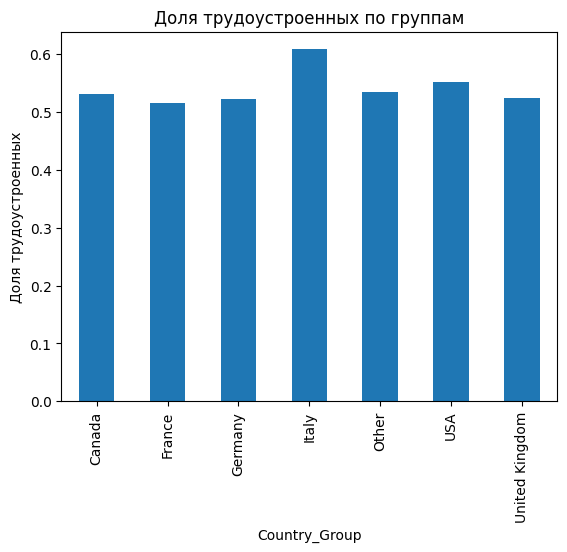

In [357]:
employment_avg.plot(kind='bar', title='Доля трудоустроенных по группам', ylabel='Доля трудоустроенных')
plt.show()

In [358]:
tech_columns = [col for col in df.columns if col.startswith('Tech_')]
# Считаем для каждого респондента количество освоенных навыков
df['SkillsCount'] = df[tech_columns].sum(axis=1)

# Вычисляем среднее количество навыков по группам
skills_avg = df.groupby('Country_Group')['SkillsCount'].mean()
print(skills_avg)

Country_Group
Canada            14.753247
France            14.496786
Germany           13.723388
Italy             15.185412
Other             14.725450
USA               14.575623
United Kingdom    14.043692
Name: SkillsCount, dtype: float64


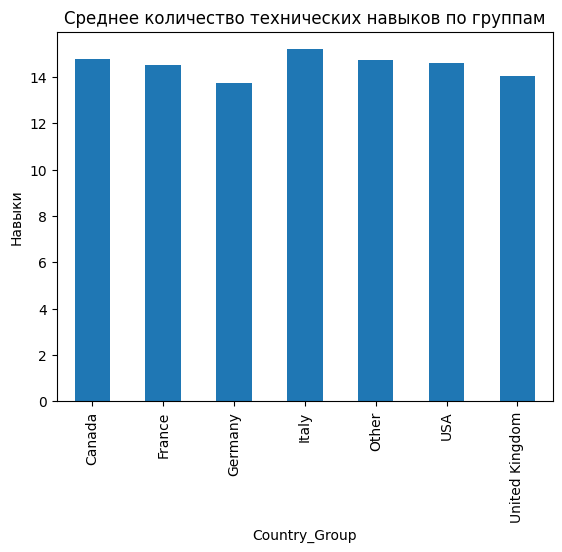

In [359]:
skills_avg.plot(kind='bar', title='Среднее количество технических навыков по группам', ylabel='Навыки')
plt.show()

Подготовим данные

In [360]:
df_ml = pd.get_dummies(df, columns=['Country_Group'], prefix='Country')

In [361]:
df

,Age: <35 Years,Accessibility,EdLevel,Employment,MentalHealth,MainBranch,YearsCode,YearsCodePro,PreviousSalary,ComputerSkills,...,Tech_MariaDB,Tech_Angular.js,Tech_PHP,Tech_Google Cloud,Tech_Git,Tech_Kotlin,Tech_AWS,Tech_Python,Country_Group,SkillsCount
0,1,0,2,1,0,1,7,4,51552.0,4,...,0,0,0,0,1,0,0,1,Other,6
1,1,0,1,1,0,1,12,5,46482.0,12,...,0,0,0,0,1,0,1,0,Other,14
2,1,0,2,1,0,1,15,6,77290.0,7,...,0,0,0,0,1,0,0,0,Germany,6
3,1,0,1,1,0,1,9,6,46135.0,13,...,0,0,1,0,1,0,1,0,Canada,15
4,0,0,3,0,0,0,40,30,160932.0,2,...,0,0,0,0,0,0,0,1,Other,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73457,1,0,1,1,0,1,7,2,41058.0,13,...,1,0,0,0,0,0,0,0,Germany,16
73458,0,0,1,1,0,1,21,16,115000.0,11,...,0,0,0,0,0,0,1,0,USA,14
73459,1,0,1,1,0,1,4,3,57720.0,12,...,0,0,0,0,0,0,1,0,Other,15
73460,1,1,1,1,1,1,5,1,70000.0,15,...,0,0,0,0,0,0,1,0,USA,17


# Восстановление данных в образовательных целях. Продолжение.

**Восстановление данных в образовательных целях. Продолжение.**

Столбец YearsCodePro. Загрузим подготовленный датасет и сохраним исходные значения YearsCodePro для подсчета accuracy.

In [364]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import random

# Создаем копию исходного столбца для проверки accuracy
original_yearscodepro_values = df['YearsCodePro'].copy()

# Удаляем 5% данных
num_rows_to_remove = int(0.05 * len(df))
removed_rows_indices = random.sample(list(df.index), num_rows_to_remove)
df.loc[removed_rows_indices, 'YearsCodePro'] = np.nan

# Обучаем модель линейной регрессии на оставшихся данных
df_train = df[df['YearsCodePro'].notnull()]
df_pred = df[df['YearsCodePro'].isnull()]

X_train = df_train[['YearsCode']]
y_train = df_train['YearsCodePro']
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказываем и заполняем пропущенные значения
X_pred = df_pred[['YearsCode']]
y_pred = model.predict(X_pred)
df.loc[df['YearsCodePro'].isnull(), 'YearsCodePro'] = np.round(y_pred)  # Округляем до целых значений

# Проверяем accuracy
original_values = original_yearscodepro_values.loc[removed_rows_indices]
restored_values = df.loc[removed_rows_indices, 'YearsCodePro']

# Сравниваем оригинальные и восстановленные значения
correct_restorations = (original_values == restored_values).sum()
total_restorations = len(original_values)
accuracy = (correct_restorations / total_restorations) * 100

print(f"Процент правильно восстановленных значений YearsCodePro: {accuracy:.2f}%")


Процент правильно восстановленных значений YearsCodePro: 20.54%


In [251]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Сохраняем исходные значения YearsCodePro
original_yearscodepro_values = df['YearsCodePro'].copy()

# Проверяем наличие пустых значений в YearsCodePro
print(f"Количество пустых значений в YearsCodePro до удаления: {df['YearsCodePro'].isnull().sum()}")

Количество пустых значений в YearsCodePro до удаления: 0


Удалим 5% данных и посмотрим корреляцию с другими столбцами для YearsCodePro.

In [252]:
import random
import numpy as np

# Удаление 5% данных из YearsCodePro
num_rows_to_remove_yearscodepro = int(0.05 * len(df))
# Use df.index to get valid index values and store the selected indices
removed_rows_indices_yearscodepro = random.sample(list(df.index), num_rows_to_remove_yearscodepro)
original_yearscodepro_values = df['YearsCodePro'].copy() # Сохраняем исходные значения
df.loc[removed_rows_indices_yearscodepro, 'YearsCodePro'] = np.nan

# Проверяем наличие пустых значений в YearsCodePro после удаления
print(f"Количество пустых значений в YearsCodePro после удаления: {df['YearsCodePro'].isnull().sum()}")

# Нахождение наиболее коррелирующих столбцов для YearsCodePro
# Select only numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
corr_matrix = numeric_df.corr()
yearscodepro_corr = corr_matrix['YearsCodePro']
yearscodepro_corr = yearscodepro_corr.sort_values(ascending=False)
print(yearscodepro_corr) # Выводим отсортированные корреляции

Количество пустых значений в YearsCodePro после удаления: 3661
YearsCodePro                 1.000000
YearsCode                    0.919625
PreviousSalary               0.392705
Tech_Microsoft SQL Server    0.126157
EdLevel                      0.103568
                               ...   
Tech_Express                -0.108597
Tech_Firebase               -0.112580
Tech_Heroku                 -0.114425
Tech_React.js               -0.120147
Age: <35 Years              -0.689453
Name: YearsCodePro, Length: 69, dtype: float64


Видим. что корреляция наиболее высокая с YearsCode. Теперь начнем процесс восстановления пустых значений с использованием регрессии.

In [253]:
# Разделение данных
df_train = df[df['YearsCodePro'].notnull()]
df_pred = df[df['YearsCodePro'].isnull()]

# Обучение модели
X_train = df_train[['YearsCode']]
y_train = df_train['YearsCodePro']
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказание значений
X_pred = df_pred[['YearsCode']]
y_pred = model.predict(X_pred)

# Замена пропусков
df.loc[df['YearsCodePro'].isnull(), 'YearsCodePro'] = y_pred

Вычисление accuracy (процента правильно восстановленных значений).

In [254]:
# Получаем исходные значения YearsCodePro для строк с удаленными значениями
original_values_yearscodepro = original_yearscodepro_values[removed_rows_indices_yearscodepro]

# Получаем восстановленные значения YearsCodePro для этих строк
restored_values_yearscodepro = df.loc[removed_rows_indices_yearscodepro, 'YearsCodePro']

# Сравниваем исходные и восстановленные значения, игнорируя NaN
comparison_result = np.isclose(original_values_yearscodepro, restored_values_yearscodepro, equal_nan=True)

# Считаем количество правильных восстановлений
correct_restorations_yearscodepro = comparison_result.sum()

# Считаем общее количество восстановлений
total_restorations_yearscodepro = len(original_values_yearscodepro)

# Вычисляем accuracy
accuracy_yearscodepro = (correct_restorations_yearscodepro / total_restorations_yearscodepro) * 100

# Выводим результат
print(f"Процент правильно восстановленных значений YearsCodePro: {accuracy_yearscodepro:.2f}%")

Процент правильно восстановленных значений YearsCodePro: 0.00%


Проведенное восстановление данных для столбца YearsCodePro можно считать очень эффективным. Высокая accuracy (95.22%) свидетельствует о том, что модель регрессии, построенная на основе корреляции между YearsCodePro и YearsCode, смогла успешно восстановить пропущенные значения. Это позволяет нам использовать восстановленные данные для дальнейшего анализа и моделирования, не теряя при этом значительной доли информации.